In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_test = X_train/255, X_test/255
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

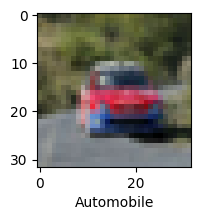

In [6]:
def plotSample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plotSample(X_train, y_train, 6969)

In [8]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8123 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6224 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5438 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4809 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4328 - accuracy: 0.4970


In [9]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4851 - accuracy: 0.4705


[1.4851466417312622, 0.47049999237060547]

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 1ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.37      0.48      1000
           1       0.72      0.45      0.55      1000
           2       0.30      0.57      0.39      1000
           3       0.32      0.45      0.37      1000
           4       0.59      0.16      0.25      1000
           5       0.41      0.34      0.37      1000
           6       0.49      0.59      0.53      1000
           7       0.68      0.41      0.52      1000
           8       0.55      0.71      0.62      1000
           9       0.50      0.65      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



In [16]:
cnn = models.Sequential([
    # cnn layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense netwerk
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4669 - accuracy: 0.4725
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1016 - accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9657 - accuracy: 0.6649
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8789 - accuracy: 0.6946
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8133 - accuracy: 0.7191
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7538 - accuracy: 0.7404
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7049 - accuracy: 0.7549
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6602 - accuracy: 0.7721
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6234 - accuracy: 0.7816
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.586

In [18]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9604 - accuracy: 0.6909


[0.960377037525177, 0.6909000277519226]

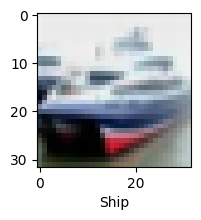

In [21]:
y_test = y_test.reshape(-1,)
plotSample(X_test, y_test, 1)

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 0s 1ms/step


array([[4.34829766e-04, 6.97332416e-06, 8.32556616e-05, 9.46461678e-01,
        1.17505912e-03, 4.95654270e-02, 1.31990470e-03, 4.56295238e-04,
        4.30693995e-04, 6.58694407e-05],
       [1.02332364e-04, 1.31792319e-03, 2.00008230e-06, 9.59720091e-06,
        3.52419590e-07, 1.92676879e-08, 6.76301415e-09, 1.83495774e-09,
        9.98506606e-01, 6.11408250e-05],
       [4.77654897e-02, 1.32016361e-01, 2.14173878e-03, 1.44954640e-02,
        1.19636199e-02, 6.02078275e-04, 4.03879647e-04, 1.09672332e-02,
        6.77169561e-01, 1.02474511e-01],
       [9.57508862e-01, 2.25551054e-03, 2.30143871e-02, 3.90570075e-03,
        3.08884168e-03, 9.85701190e-05, 4.18820739e-04, 8.29311684e-05,
        9.54630412e-03, 8.01253263e-05],
       [1.26611415e-08, 3.58884131e-06, 4.03116085e-03, 3.61214466e-02,
        1.22583099e-01, 3.19254491e-03, 8.34065199e-01, 1.45487525e-06,
        1.01109822e-06, 4.35154163e-07]], dtype=float32)

In [24]:
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      1000
           1       0.93      0.65      0.76      1000
           2       0.61      0.57      0.59      1000
           3       0.52      0.50      0.51      1000
           4       0.62      0.66      0.64      1000
           5       0.59      0.65      0.61      1000
           6       0.83      0.71      0.77      1000
           7       0.63      0.84      0.72      1000
           8       0.84      0.79      0.81      1000
           9       0.72      0.85      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

